<center><h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">House Price Prediction 🏠 Modeling</h1></center>

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Importing the required Libraries, Metrics</h1>

In [25]:
!pip install -r requirements.txt

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Loading the saved NumPy arrays i.e. X_train_df, X_test_df, y_train_df, and y_test_df </h1>

In [27]:
import numpy as np
import pandas as pd
X_train = np.load('../Data/X_train.npy')
X_test = np.load('../Data/X_test.npy')
y_train = np.load('../Data/y_train.npy')
y_test = np.load('../Data/y_test.npy')
X = np.load('../Data/X.npy')
y = np.load('../Data/y.npy')

***Declaring Evaluation functions***

In [28]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Regression Models</h1>

***Defining a DataFrame to Store Evaluation Values***

In [29]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Linear Regression</h2>

In [30]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
new_row_df = pd.DataFrame([new_row])
models = pd.concat([models, new_row_df], ignore_index=True)

MAE: 112284.0687040266
MSE: 17230587706.375965
RMSE: 131265.3332238789
R2 Score: -0.02693895079877806
------------------------------
RMSE Cross-Validation: 129717.5970147188


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Ridge Regression</h2>

In [31]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
new_row_df = pd.DataFrame([new_row])
models = pd.concat([models, new_row_df], ignore_index=True)

MAE: 112283.53118743435
MSE: 17230435828.26678
RMSE: 131264.75470691582
R2 Score: -0.026929898899402893
------------------------------
RMSE Cross-Validation: 129717.19028732981


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Lasso Regression</h2>

In [32]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
new_row_df = pd.DataFrame([new_row])
models = pd.concat([models, new_row_df], ignore_index=True)

MAE: 112283.95623165231
MSE: 17230542527.546352
RMSE: 131265.1611340433
R2 Score: -0.026936258151221804
------------------------------
RMSE Cross-Validation: 129717.44471633476


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Elastic Net</h2>

In [33]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
new_row_df = pd.DataFrame([new_row])
models = pd.concat([models, new_row_df], ignore_index=True)

MAE: 112115.28650098939
MSE: 17186163527.578716
RMSE: 131096.0088163584
R2 Score: -0.02429128025256322
------------------------------
RMSE Cross-Validation: 129616.77367986394


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Support Vector Machines</h2>

In [34]:
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
new_row_df = pd.DataFrame([new_row])
models = pd.concat([models, new_row_df], ignore_index=True)

MAE: 111693.74180471453
MSE: 17306973079.90421
RMSE: 131555.96938149256
R2 Score: -0.03149150098941611
------------------------------
RMSE Cross-Validation: 130065.05881065906


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Random Forest Regressor</h2>

In [35]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
new_row_df = pd.DataFrame([new_row])
models = pd.concat([models, new_row_df], ignore_index=True)

MAE: 115867.71575000002
MSE: 18494378929.604958
RMSE: 135994.04005177933
R2 Score: -0.10226060870898612
------------------------------
RMSE Cross-Validation: 135392.9990824813


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">XGBoost Regressor</h2>

In [36]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
new_row_df = pd.DataFrame([new_row])
models = pd.concat([models, new_row_df], ignore_index=True)

MAE: 121939.940390625
MSE: 20889057084.427193
RMSE: 144530.47112781164
R2 Score: -0.2449828601910935
------------------------------
RMSE Cross-Validation: 141667.0529732707


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Model Comparison</h1>

***The model's performance improves as the Root Mean Squared Error (RMSE) decreases.***

In [37]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
3,ElasticNet,112115.286501,1.718616e+10,131096.008816,-0.024291,129616.773680
1,Ridge,112283.531187,1.723044e+10,131264.754707,-0.026930,129717.190287
2,Lasso,112283.956232,1.723054e+10,131265.161134,-0.026936,129717.444716
0,LinearRegression,112284.068704,1.723059e+10,131265.333224,-0.026939,129717.597015
4,SVR,111693.741805,1.730697e+10,131555.969381,-0.031492,130065.058811
5,RandomForestRegressor,115867.715750,1.849438e+10,135994.040052,-0.102261,135392.999082
6,XGBRegressor,121939.940391,2.088906e+10,144530.471128,-0.244983,141667.052973


***RMSE (Cross-Validation) is less in ElasticNet Model***

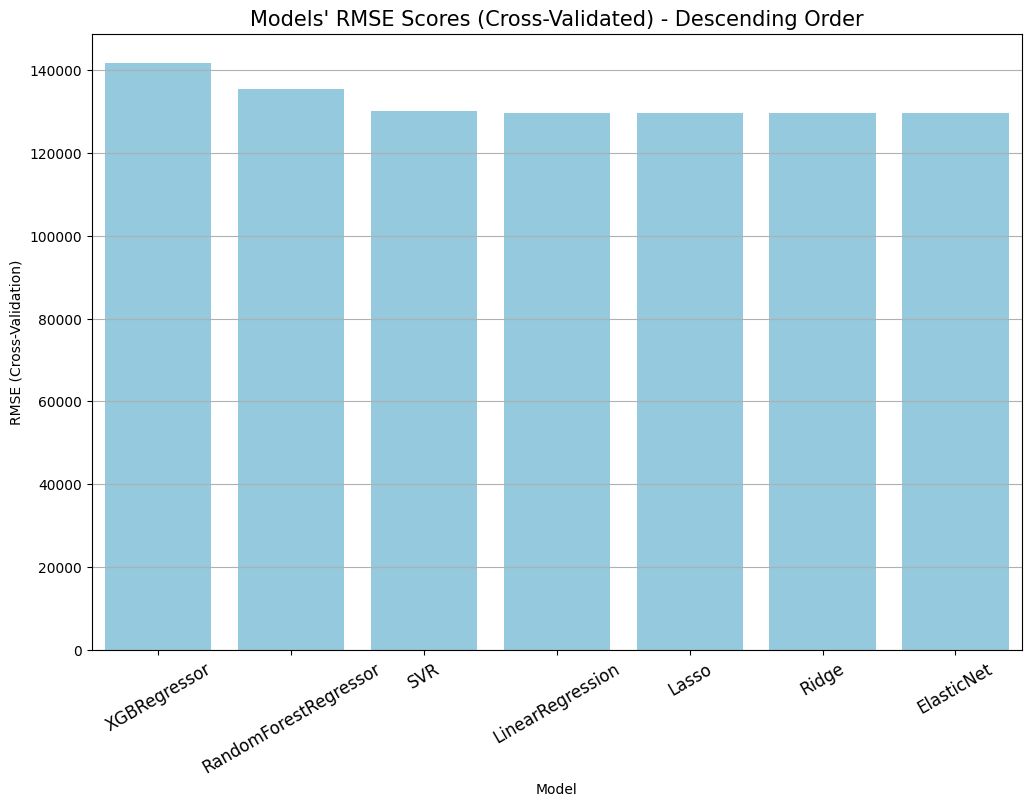

In [38]:
sorted_models = models.sort_values(by='RMSE (Cross-Validation)', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='RMSE (Cross-Validation)', data=sorted_models, color='skyblue')
plt.title("Models' RMSE Scores (Cross-Validated) - Descending Order", size=15)
plt.xticks(rotation=30, size=12)
plt.ylabel('RMSE (Cross-Validation)')
plt.xlabel('Model')
plt.grid(axis='y')
plt.show()

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Build ElasticNet model with best parameters</h1>

In [39]:
elastic_net = ElasticNet()
param_grid = {
    'alpha': [0.1, 0.5, 1.0], 
    'l1_ratio': [0.1, 0.5, 0.9] 
}
scorer = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)


Best Parameters: {'alpha': 1.0, 'l1_ratio': 0.1}
Best Estimator: ElasticNet(l1_ratio=0.1)


In [40]:
best_alpha = 1.0
best_l1_ratio = 0.1
best_elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
best_elastic_net.fit(X_train, y_train)
predictions = best_elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(best_elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet_WITH BEST PARAMS","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
new_row_df = pd.DataFrame([new_row])
models = pd.concat([models, new_row_df], ignore_index=True)

MAE: 112023.34277968363
MSE: 17164540109.580826
RMSE: 131013.51117186664
R2 Score: -0.023002529655668624
------------------------------
RMSE Cross-Validation: 129576.8132376204


In [41]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
7,ElasticNet_WITH BEST PARAMS,112023.342780,1.716454e+10,131013.511172,-0.023003,129576.813238
3,ElasticNet,112115.286501,1.718616e+10,131096.008816,-0.024291,129616.773680
1,Ridge,112283.531187,1.723044e+10,131264.754707,-0.026930,129717.190287
2,Lasso,112283.956232,1.723054e+10,131265.161134,-0.026936,129717.444716
0,LinearRegression,112284.068704,1.723059e+10,131265.333224,-0.026939,129717.597015
4,SVR,111693.741805,1.730697e+10,131555.969381,-0.031492,130065.058811
5,RandomForestRegressor,115867.715750,1.849438e+10,135994.040052,-0.102261,135392.999082
6,XGBRegressor,121939.940391,2.088906e+10,144530.471128,-0.244983,141667.052973


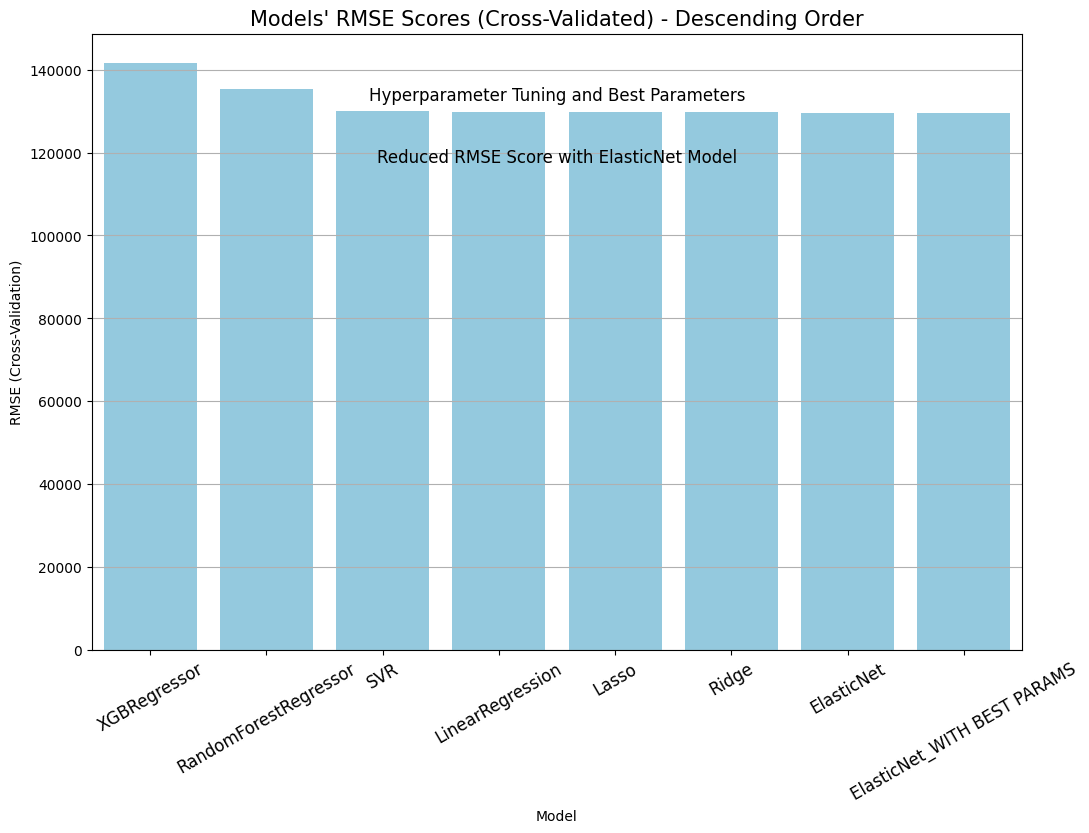

In [42]:
sorted_models = models.sort_values(by='RMSE (Cross-Validation)', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='RMSE (Cross-Validation)', data=sorted_models, color='skyblue')
plt.title("Models' RMSE Scores (Cross-Validated) - Descending Order", size=15)
plt.xticks(rotation=30, size=12)
plt.ylabel('RMSE (Cross-Validation)')
plt.xlabel('Model')
plt.grid(axis='y')
plt.text(0.5, 0.9, 'Hyperparameter Tuning and Best Parameters', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.5, 0.8, 'Reduced RMSE Score with ElasticNet Model', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)

plt.show()


***Comparison of House Prices and RMSE Cross-Validation***

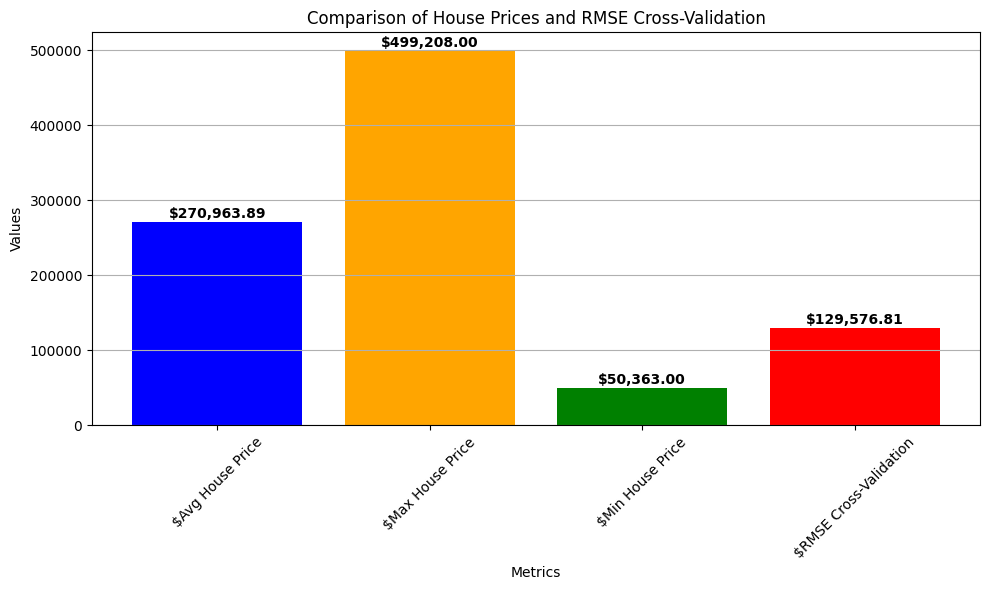

In [43]:
average_house_price = y.mean()
maximum_house_price = y.max()
rmse_cross_val = rmse_cv(best_elastic_net)
minimum_house_price = y.min()

values = [average_house_price, maximum_house_price, minimum_house_price, rmse_cross_val]
labels = ['$Avg House Price', '$Max House Price', '$Min House Price', '$RMSE Cross-Validation']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['blue', 'orange', 'green', 'red'])

for bar, v in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, v + max(values) * 0.01, f"${v:,.2f}", ha='center', color='black', fontweight='bold')

plt.title('Comparison of House Prices and RMSE Cross-Validation')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()


## <span style="font-family: 'Times New Roman'">Why I Choose RMSE Over MAE</span>

- ***I have selected RMSE (Root Mean Square Error) instead of MAE (Mean Absolute Error) because RMSE gives higher weight to larger errors.***
- ***This helps capture significant errors better, providing a clearer picture of how well our predictive model performs.***

### <span style="font-family: 'Times New Roman'">RMSE Greater Than Doble the Minimum House Price - A Serious Problem</span>

- ***RMSE goes beyond the double the minimum house price, it's a big issue.***
- ***This situation suggests our model isn't doing well, possibly due to not having enough data, leading to underfitting.***
- ***To improve this, I'm focusing on refining the model through hyperparameter tuning with Boosting algorithms.***


***Over/underfitting check***

In [44]:
# build stochastic Gradient Boosting Regressor
sgbr= GradientBoostingRegressor(learning_rate= 0.1, max_depth= 3, min_samples_split= 35, n_estimators= 300, subsample= 0.8, random_state= 100)
sgbr.fit(X_train, y_train)
rmse_cv(sgbr)
# Create a list of base estimators
estimators= [ ('Ridge', ridge), 
             ('lasso', lasso),
            ('sgbr', sgbr)]
# Instantiate and fit the VotingRegressor model
voting = VotingRegressor(estimators= estimators, weights= [0.2, 0.2, 0.6]).fit(X_train, y_train)
kf= KFold(n_splits=8, shuffle= True, random_state= 100)
cv_scores= np.sqrt(-cross_val_score(voting, X_train, y_train, cv= kf, scoring="neg_mean_squared_error"))
y_pred_train= voting.predict(X_train)
y_pred_test= voting.predict(X_test)
print(f"- voting regressor model CV mean error score = {np.mean(cv_scores):0.3f}")    
print(f"- voting regressor model train mean error score = {np.sqrt(mean_squared_error(y_train, y_pred_train)):0.3f}")    
print(f"- voting regressor model test mean error score = {np.sqrt(mean_squared_error(y_test, y_pred_test)):0.3f}")

- voting regressor model CV mean error score = 135631.045
- voting regressor model train mean error score = 94616.973
- voting regressor model test mean error score = 136287.489


## <span style="font-family: 'Times New Roman'">Interpreting Model Performance</span>

When the Cross-Validation (CV) error is notably higher than the training error, it could imply that the model struggles to generalize to unseen data. This discrepancy might suggest potential underfitting issues, where the model doesn't capture the complexities within the data, resulting in poor performance on unseen instances.

### <span style="font-family: 'Times New Roman'">Mitigating Underfitting</span>

To address potential underfitting concerns, one strategy involves increasing the model's complexity and exploring hyperparameter tuning with sophisticated algorithms such as GradientBoostingRegressor, using techniques like RandomizedSearchCV.

- **RandomizedSearchCV**: Utilize this method to efficiently explore a range of hyperparameters, allowing the model to learn more intricate patterns within the data.
- **GradientBoostingRegressor**: Implement more complex models like Gradient Boosting, known for its ability to handle non-linear relationships and improve predictive performance.

By adjusting the model's complexity and exploring advanced algorithms with randomized hyperparameter search, we aim to enhance the model's ability to capture intricate patterns and improve its performance on unseen data.


***Model Tuning with GradientBoostingRegressor***

In [45]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}
gbr = GradientBoostingRegressor(random_state=0)
gbr_random_search = RandomizedSearchCV(gbr, param_dist, n_iter=10, cv=3, random_state=0)
gbr_random_search.fit(X_train, y_train)
best_params = gbr_random_search.best_params_
gbr_best = GradientBoostingRegressor(**best_params, random_state=0)
gbr_best.fit(X_train, y_train)
y_pred = gbr_best.predict(X_test)
print("Best Parameters:", best_params)
mse_cross_val = rmse_cv(gbr_best)
print("RMSE Cross-Validation:", mse_cross_val)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 5, 'learning_rate': 0.01}
RMSE Cross-Validation: 130798.05703608603


***Comparison of RMSE Cross-Validation Scores of Elastic Net and Gradient Boosting Regressor***

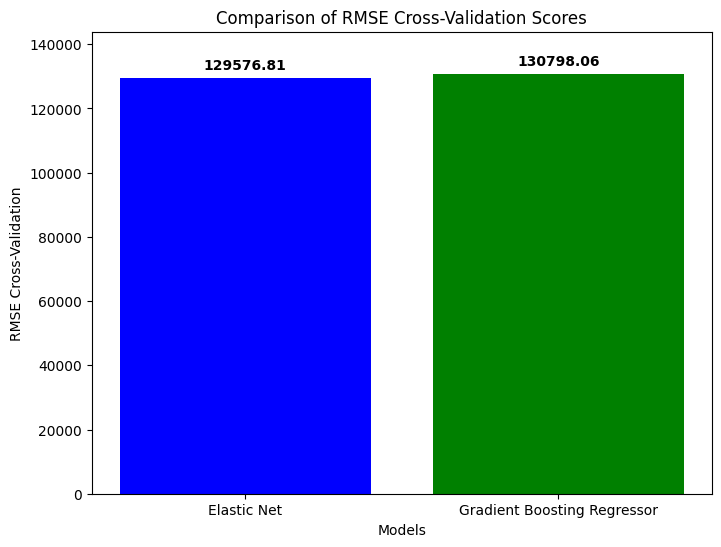

In [46]:
import matplotlib.pyplot as plt

models = ['Elastic Net', 'Gradient Boosting Regressor']
rmse_scores = [rmse_cv(best_elastic_net), rmse_cv(gbr_best)]

plt.figure(figsize=(8, 6))
plt.bar(models, rmse_scores, color=['blue', 'green'])
plt.title('Comparison of RMSE Cross-Validation Scores')
plt.xlabel('Models')
plt.ylabel('RMSE Cross-Validation')
plt.ylim(0, max(rmse_scores) * 1.1) 

for i, v in enumerate(rmse_scores):
    plt.text(i, v + max(rmse_scores) * 0.02, str(round(v, 2)), ha='center', color='black', fontweight='bold')

plt.show()


## <span style="font-family: 'Times New Roman'">Comparison of Elastic Net and Gradient Boosting Regressor</span>

- ***RMSE CV score is better in Elastic Net than Gradient Boosting Regressor due to the data's linear relationship favoring Elastic Net's regularization, providing better performance in this context.***
- ***So,  opting for the Elastic Net model with the best parameters could be a better choice for making predictions.***

## <span style="font-family: 'Times New Roman'">Hosting ElasticNet model using Streamlit</span>


***Train and Save the Model***

In [47]:
elastic_net = ElasticNet()
param_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}
scorer = make_scorer(mean_squared_error, greater_is_better=False)
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

best_elastic_net = ElasticNet(**best_params)
best_elastic_net.fit(X_train, y_train)


ElasticNet(l1_ratio=0.1)

***Serialize the Model:***

In [48]:
import joblib
joblib.dump(best_elastic_net, 'elastic_net_model.pkl')

['elastic_net_model.pkl']